# <strong>Tensor Flow Deep Learning
<strong>Chapter 6 : MNIST</strong> 

<br>
## <strong>1 MNIST Train
<strong> 숫자 필기 이미지 데이터 분석

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
# one_hot = True : one_hot 방식의 데이터를 생성
mnist = input_data.read_data_sets("./data/mnist/", one_hot=True)

/home/markbaum/Python/python36/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Extracting ./data/mnist/train-images-idx3-ubyte.gz
Extracting ./data/mnist/train-labels-idx1-ubyte.gz
Extracting ./data/mnist/t10k-images-idx3-ubyte.gz
Extracting ./data/mnist/t10k-labels-idx1-ubyte.gz


In [ ]:
# 1. 신경망 모델 구성
# 1) .placeholder( ,[배치크기, 특성값]) : 총 784개의 특성값 (28x28 픽셀)
X = tf.placeholder(tf.float32, [None, 784]) 
Y = tf.placeholder(tf.float32, [None, 10])  # target : 0 ~ 9 (10 가지 분류)

In [ ]:
# 2) 신경망의 레이어
# 784(입력 특성값) -> 256(히든레이어 뉴런) -> 256(히든레이어 뉴런) -> 10(결과값 0~9)
# stddev = 0.01 : 표준편차 0.01인 정규분포를 갖는 임의의 값으로 변수를 초기화
W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01)) 

# tf.matmul  : 각 계층의 입력값에 가중치를 곱한다
# tf.nn.relu : 활성화 함수로 신경망 계층을 생성
L1 = tf.nn.relu(tf.matmul(X, W1))   # 입력값 X 가중치, ReLU 함수로 레이어를 생성

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))

# 3) 최종 모델의 출력 :  W3 변수를 곱해 10개의 분류를 출력
W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L2, W3)  # 출력층 : 활성화 함수를 사용하지 않는다

# 4) cost 최적화 함수
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [4]:
# 2. 신경망 모델 학습 (Train)
# 1) parameter 정의
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

In [6]:
# 2) Train the Graph
for epoch in range(15):  # epoch : 학습 데이터를 한 바퀴 돌림
    total_cost = 0
    for i in range(total_batch):  # mnist.train.next_batch() : 지정한 만큼 학습데이터 호출
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y: batch_ys})
        total_cost += cost_val
    if epoch % 3 == 0 :
        print('Epoch:', '%04d' % (epoch + 1),
              'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))
print('최적화 완료!')

Epoch: 0001 Avg. cost = 0.405
Epoch: 0004 Avg. cost = 0.069
Epoch: 0007 Avg. cost = 0.031
Epoch: 0010 Avg. cost = 0.018
Epoch: 0013 Avg. cost = 0.011
최적화 완료!


In [7]:
# 3. 모델의 성능 확인 (model 예측과 실제 레이블을 비교)
# tf.argmax 함수를 이용해 예측한 값에서 가장 큰 값을 예측한 레이블이라고 평가합니다.
# 예) [0.1, 0, 0, 0.7, 0, 0.2, 0, 0, 0, 0] -> 3

# tf.equal() : tensor 값을 비교하여 True/ False 를 출력
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
# tf.cast() : is_correct의 값을 0, 1로 변환한다
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy,
                         feed_dict={X : mnist.test.images,
                                    Y : mnist.test.labels}))

정확도: 0.979


In [18]:
# Train 모델의 세부내용 출력
print(sess.run(model, feed_dict={X : mnist.test.images, Y: mnist.test.labels}))

[[-10.6884613  -11.8164835   -3.03924012 ...,  19.36190796 -10.34820652
   -3.59656668]
 [ -6.42169428  -3.068295    19.35770607 ..., -11.09740829  -6.10542965
  -36.0905304 ]
 [-17.0680294   11.70736217   0.52095079 ...,  -0.10913999  -3.02745914
  -16.98403931]
 ..., 
 [-22.34352875 -12.02295494 -21.02274132 ...,  -3.55816388  -7.84017086
   -2.69548225]
 [-13.52715778 -21.37237167 -20.31888771 ..., -10.68719101  -2.74584246
  -13.3724556 ]
 [-12.57236671  -6.29319477 -12.4630785  ..., -25.37634087  -4.16014671
  -18.91115952]]


In [17]:
# is_correct 결과를 출력
print(sess.run(is_correct, feed_dict={X : mnist.test.images, Y: mnist.test.labels}))

[ True  True  True ...,  True  True  True]


<br>
## <strong>2 Drop Out
모델의 고도화로 인한 <strong> '과적합'을 방지</strong> 하는 기술적 방법

<img src="https://pgaleone.eu/images/dropout/dropout.jpeg" align='left' width='400'>

In [19]:
# 과적합 방지 기법 중 하나인 Dropout 을 사용해봅니다.
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./data/mnist/", one_hot=True)

Extracting ./data/mnist/train-images-idx3-ubyte.gz
Extracting ./data/mnist/train-labels-idx1-ubyte.gz
Extracting ./data/mnist/t10k-images-idx3-ubyte.gz
Extracting ./data/mnist/t10k-labels-idx1-ubyte.gz


In [20]:
# 1. 신경망 모델 구성
# 1) tensor 의 입력
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

# 2) Graph 의 설계
W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))
L1 = tf.nn.dropout(L1, keep_prob)   # 텐서플로우 내장함수로 dropout (레이어, 확율만 입력)

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))
L2 = tf.nn.dropout(L2, keep_prob)

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L2, W3)

In [21]:
# 3) Cost 함수를 정의
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [ ]:
# 2. 신경망 모델 학습
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 1) 파라미터 설정
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

In [22]:
# 2) 모델의 훈련 ( keep_prob: 0.8 - 신경망 중 80% 만 활용)
for epoch in range(30):
    total_cost = 0
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs, Y: batch_ys, keep_prob: 0.8})
        total_cost += cost_val
    if epoch % 5 == 0:
        print('Epoch:', '%04d' % (epoch + 1),
              'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))
print('최적화 완료!')

Epoch: 0001 Avg. cost = 0.435
Epoch: 0006 Avg. cost = 0.062
Epoch: 0011 Avg. cost = 0.035
Epoch: 0016 Avg. cost = 0.024
Epoch: 0021 Avg. cost = 0.019
Epoch: 0026 Avg. cost = 0.017
최적화 완료!


In [23]:
# 3. 훈련 모델의 성능평가 ( keep_prob : 1 - 신경망 100% 를 활용)
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy,
                        feed_dict={X: mnist.test.images,
                                   Y: mnist.test.labels,
                                   keep_prob: 1}))

정확도: 0.9827


<br>
## <strong>3 matplotlib
결과를 <strong>matplotlib</strong> 로 시각화

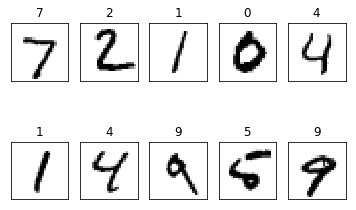

In [24]:
# 4. 훈련 모델의 결과 시각화 확인 (matplot)
labels = sess.run(model,
                  feed_dict={X: mnist.test.images,
                             Y: mnist.test.labels,
                             keep_prob: 1})
fig = plt.figure()
for i in range(10):
    subplot = fig.add_subplot(2, 5, i+1)   # 2행 5열 그래프 생성, i + 1 번쨰에 이미지를 출력
    subplot.set_xticks([])  # 꺠끗한 이미지를 위해, x축 y축 눈금을 출력하지 않는다
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(labels[i]))         # 이미지 title에, 대상'숫자'를 출력
    subplot.imshow(mnist.test.images[i].reshape((28, 28)), # 28 x 28의 2차원 배열로 이미지 출력
                   cmap = plt.cm.gray_r)
plt.show()